In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def gammaNoise(oldimg, a, b):
    if len(oldimg.shape) == 3 and oldimg.shape[2] == 3:  # RGB image
        R, C, L = oldimg.shape
        newimg = np.zeros_like(oldimg)
    else:  # Grayscale image
        R, C = oldimg.shape
        newimg = np.zeros((R, C))
    
    for i in range(1, 256):
        number_of_pixel = round((((a ** b) * (i ** (b - 1))) / np.math.factorial(b - 1)) * (np.exp(-(a * i))) * R * C)
        for j in range(number_of_pixel):
            row = np.random.randint(0, R)
            column = np.random.randint(0, C)
            if len(oldimg.shape) == 3 and oldimg.shape[2] == 3:  # RGB image
                for k in range(3):
                    newimg[row, column, k] = oldimg[row, column, k] + i
            else:  # Grayscale image
                newimg[row, column] = oldimg[row, column] + i
    
    if len(oldimg.shape) == 3 and oldimg.shape[2] == 3:  # RGB image
        for i in range(3):
            mn = np.min(newimg[:, :, i])
            mx = np.max(newimg[:, :, i])
            newimg[:, :, i] = ((newimg[:, :, i] - mn) / (mx - mn)) * 255
    else:  # Grayscale image
        mn = np.min(newimg)
        mx = np.max(newimg)
        newimg = ((newimg - mn) / (mx - mn)) * 255
    
    return newimg

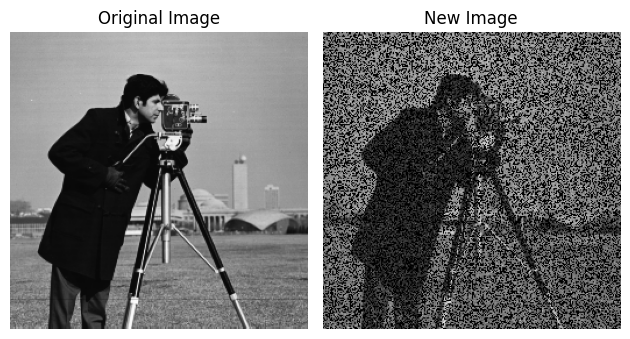

In [14]:
#Read the image
image = cv2.imread('cameraman.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Specify the parameter
a=0.1
b=5

# Apply gammaNoise function
newImage = gammaNoise(gray_image, a, b)

# Display the original image and new image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(newImage, cmap='gray')
plt.title('New Image')
plt.axis('off')

plt.tight_layout()
plt.show()